In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# 簡易計算と詳細計算の比較
## 詳細計算の結果を読み込む

In [2]:
# CSVファイルを読み込む
df = pd.read_csv('wall_status_data_frame_detailed.csv', index_col=0)

# 収束しなかった場合のデータを削除する
df = df.query("is_optimize_succeed == True")

# 分析用にメッセージ列を削除
df = df.drop(["is_optimize_succeed", "optimize_message"], axis=1)

# 1つでも欠損値NaNがある行を削除する
df = df[~np.isnan(df).any(axis=1)]

# 冬期条件、夏期条件の計算結果を抽出
df_detailed = pd.concat([df.query("theta_e <= 10.0 & theta_r == 20.0"), df.query("theta_e >= 25.0 & theta_r == 27.0")])
df_detailed

,theta_e,theta_r,j_surf,a_surf,C_1,C_2,l_h,l_w,l_d,angle,...,h_cv,h_rv,theta_as_e,k_e,q_room_side,heat_balance_0,heat_balance_1,heat_balance_2,heat_balance_3,heat_balance_4
0,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,2.825350,0.434728,-4.623813,0.820794,-2.363617,0.000000e+00,2.220446e-15,-1.776357e-15,2.842171e-14,-2.220446e-16
1,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,2.488053,2.077843,-4.887580,0.829586,-2.409223,0.000000e+00,3.552714e-15,3.552714e-15,0.000000e+00,-4.440892e-16
2,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,2.281691,3.586179,-4.949801,0.831660,-2.426662,-2.842171e-14,3.552714e-15,-7.105427e-15,-2.842171e-14,-4.440892e-16
3,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,4.362720,0.410906,-9.856252,0.995208,-2.892881,2.842171e-14,8.881784e-15,0.000000e+00,0.000000e+00,0.000000e+00
4,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,4.109646,1.968272,-9.814749,0.993825,-2.901498,-2.842171e-14,-3.552714e-15,-7.105427e-15,0.000000e+00,-8.881784e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708583,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,5.692031,3.780112,50.470072,0.488960,56.325852,0.000000e+00,-4.547474e-13,-1.136868e-13,8.526513e-14,0.000000e+00
708584,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,5.396892,6.610045,53.646967,0.555145,67.563938,-1.818989e-12,-2.842171e-13,-2.273737e-13,2.842171e-14,0.000000e+00
708585,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,8.095389,0.760302,40.829960,0.288124,32.615303,-9.094947e-13,4.227729e-13,5.684342e-14,-2.842171e-14,-3.552714e-15
708586,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,7.711546,3.701609,46.506060,0.406376,48.920559,-9.094947e-13,1.023182e-12,2.273737e-13,-8.526513e-14,7.105427e-15


## 簡易計算の結果を読み込む
### 簡易版の行列式による計算結果

In [3]:
# CSVファイルを読み込む
df = pd.read_csv('wall_status_data_frame_simplified_matrix.csv', index_col=0)

# 1つでも欠損値NaNがある行を削除する
df = df[~np.isnan(df).any(axis=1)]

# 相当外気温度と室温が同じ値となるケースを除外
df = df.query("theta_sat != theta_r")

# 冬期条件、夏期条件の計算結果を抽出
df_simplified_matrix = pd.concat([df.query("theta_e <= 10.0 & theta_r == 20.0"), df.query("theta_e >= 25.0 & theta_r == 27.0")])
df_simplified_matrix

,theta_e,theta_r,j_surf,a_surf,C_1,C_2,l_h,l_w,l_d,angle,...,emissivity_1,emissivity_2,theta_sat,theta_1_surf,theta_2_surf,theta_as_ave,effective_emissivity,h_cv,h_rv,q_room_side
0,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.1,-10.0,-5.208132,-3.750546,-4.479339,0.098901,2.060,0.581538,-2.348955
1,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.5,-10.0,-5.069771,-4.436321,-4.753046,0.473684,2.060,2.785263,-2.416779
2,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.9,-10.0,-5.033402,-4.616582,-4.824992,0.818182,2.060,4.810909,-2.434607
3,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.1,-10.0,-9.803944,-9.237136,-9.860788,0.098901,4.108,0.581538,-2.891585
4,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.5,-10.0,-9.686191,-9.370175,-9.863007,0.473684,4.108,2.785263,-2.904743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708583,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.5,75.0,66.286107,42.974308,39.667711,0.473684,4.108,2.785263,51.345991
708584,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.9,75.0,65.297137,46.579404,39.978745,0.818182,4.108,4.810909,62.933800
708585,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.1,75.0,65.621018,36.027559,37.945594,0.098901,6.156,0.581538,29.017155
708586,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.5,75.0,63.930636,41.167958,38.266694,0.473684,6.156,2.785263,45.539865


### 簡易式による計算結果

In [4]:
# CSVファイルを読み込む
df = pd.read_csv('wall_status_data_frame_simplified_equation.csv', index_col=0)

# 1つでも欠損値NaNがある行を削除する
df = df[~np.isnan(df).any(axis=1)]

# 相当外気温度と室温が同じ値となるケースを除外
df = df.query("theta_sat != theta_r")

# 冬期条件、夏期条件の計算結果を抽出
df_simplified_equation = pd.concat([df.query("theta_e <= 10.0 & theta_r == 20.0"), df.query("theta_e >= 25.0 & theta_r == 27.0")])
df_simplified_equation

,theta_e,theta_r,j_surf,a_surf,C_1,C_2,l_h,l_w,l_d,angle,...,emissivity_1,emissivity_2,theta_sat,theta_as_ave,effective_emissivity,h_cv,h_rv,u_o,u_i,q_room_side
0,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.1,-10.0,-4.379018,0.098901,2.060,0.581538,0.413468,0.095332,-2.324096
1,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.5,-10.0,-4.636085,0.473684,2.060,2.785263,0.445159,0.096923,-2.387796
2,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.9,-10.0,-4.730332,0.818182,2.060,4.810909,0.457553,0.097498,-2.411150
3,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.1,-10.0,-8.078844,0.098901,4.108,0.581538,0.443805,0.096858,-2.719671
4,-10.0,20.0,0.0,0.0,0.5,0.1,3.0,0.05,0.05,0.0,...,0.9,0.5,-10.0,-8.080118,0.473684,4.108,2.785263,0.457651,0.097502,-2.737873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708583,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.5,75.0,35.639659,0.473684,4.108,2.785263,5.126387,2.192116,18.939134
708584,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.9,75.0,35.775001,0.818182,4.108,4.810909,6.168220,2.362768,20.733290
708585,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.1,75.0,35.316828,0.098901,6.156,0.581538,5.039760,2.176121,18.098425
708586,35.0,27.0,1000.0,1.0,100.0,5.0,12.0,10.00,0.30,90.0,...,0.9,0.5,75.0,35.392021,0.473684,6.156,2.785263,6.178903,2.364334,19.841538


## 作図用の関数を定義
### 推定値の確認用グラフ

In [5]:
def setPltComparison(fig_title:str, x_label:str, y_label:str, x_data:np.array, y_data:np.array,
                     xlim_min:float, xlim_max:float, ylim_min:float, ylim_max:float):
    
    # グラフを表示する領域（figureオブジェクト）、グラフを描画する領域（Axesオブジェクト）を作成
    fig, ax = plt.subplots()

    # グラフタイトルを設定
    fig.suptitle(fig_title)
        
    # 補助軸の設定
    ax.grid(which='major', color='gray', linestyle='-')
    ax.grid(which='minor', color='gray', linestyle='-')
        
    # 軸ラベルの設定
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
        
    # 描画データ設定
    x = x_data
    y = y_data
                
    # 散布図の描画設定
    ax.scatter(x, y, s=30, marker=".")

    # 線形グラフの描画設定    
    ax.plot([xlim_min, xlim_max], [ylim_min, ylim_max],color="black")
        
    # 軸の描画範囲設定
    #ax.set_xlim(xlim_min, xlim_max)
    #ax.set_ylim(ylim_min, ylim_max)
    
    # グラフ描画
    plt.show()

## 計算結果の比較

- Simplified Method #1 : 簡易版の行列式による計算結果
- Simplified Method #2 : 簡易式による計算結果（放射熱伝達率をゼロとした場合）
- Simplified Method #2rev : 簡易式による計算結果（通気層内の総合熱伝達を適用した場合）

### 室内表面熱流(q_room_side)

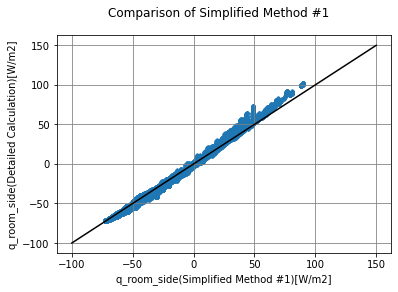

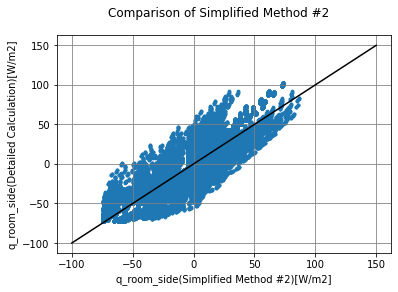

In [6]:
setPltComparison(
       fig_title = "Comparison of Simplified Method #1",
       x_label = "q_room_side(Simplified Method #1)[W/m2]",
       y_label = "q_room_side(Detailed Calculation)[W/m2]", 
       x_data = df_simplified_matrix["q_room_side"],
       y_data = df_detailed["q_room_side"],
       xlim_min = -100.0,
       xlim_max = 150.0,
       ylim_min = -100.0,
       ylim_max = 150.0
      )

setPltComparison(
       fig_title = "Comparison of Simplified Method #2",
       x_label = "q_room_side(Simplified Method #2)[W/m2]",
       y_label = "q_room_side(Detailed Calculation)[W/m2]", 
       x_data = df_simplified_equation["q_room_side"],
       y_data = df_detailed["q_room_side"],
       xlim_min = -100.0,
       xlim_max = 150.0,
       ylim_min = -100.0,
       ylim_max = 150.0
      )

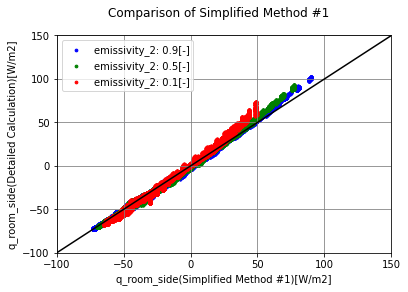

In [7]:
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# グラフタイトルを設定
fig1.suptitle("Comparison of Simplified Method #1")
    
# 補助軸の設定
ax.grid(which='major', color='gray', linestyle='-')
ax.grid(which='minor', color='gray', linestyle='-')

# 軸ラベルの設定
ax.set_xlabel('q_room_side(Simplified Method #1)[W/m2]')
ax.set_ylabel('q_room_side(Detailed Calculation)[W/m2]')

# 散布図の描画設定
ax.scatter(df_simplified_matrix.query("emissivity_2 == 0.9")['q_room_side'], df_detailed.query("emissivity_2 == 0.9")['q_room_side'], color='b', label='emissivity_2: 0.9[-]', s=30, marker=".")
ax.scatter(df_simplified_matrix.query("emissivity_2 == 0.5")['q_room_side'], df_detailed.query("emissivity_2 == 0.5")['q_room_side'], color='g', label='emissivity_2: 0.5[-]', s=30, marker=".")
ax.scatter(df_simplified_matrix.query("emissivity_2 == 0.1")['q_room_side'], df_detailed.query("emissivity_2 == 0.1")['q_room_side'], color='r', label='emissivity_2: 0.1[-]', s=30, marker=".")

# 線形グラフの描画設定    
ax.plot([-100.0, 150.0], [-100.0, 150.0],color="black")

# 軸の描画範囲設定
ax.set_xlim(-100.0, 150.0)
ax.set_ylim(-100.0, 150.0)
    
plt.legend()
plt.show()

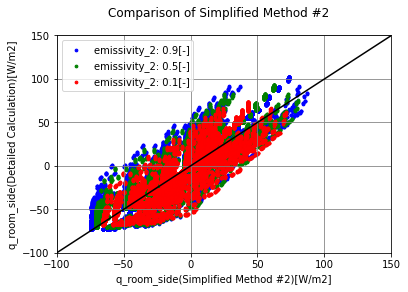

In [8]:
fig1 = plt.figure()
ax = fig1.add_subplot(1, 1, 1)

# グラフタイトルを設定
fig1.suptitle("Comparison of Simplified Method #2")
    
# 補助軸の設定
ax.grid(which='major', color='gray', linestyle='-')
ax.grid(which='minor', color='gray', linestyle='-')

# 軸ラベルの設定
ax.set_xlabel('q_room_side(Simplified Method #2)[W/m2]')
ax.set_ylabel('q_room_side(Detailed Calculation)[W/m2]')

# 散布図の描画設定
ax.scatter(df_simplified_equation.query("emissivity_2 == 0.9")['q_room_side'], df_detailed.query("emissivity_2 == 0.9")['q_room_side'], color='b', label='emissivity_2: 0.9[-]', s=30, marker=".")
ax.scatter(df_simplified_equation.query("emissivity_2 == 0.5")['q_room_side'], df_detailed.query("emissivity_2 == 0.5")['q_room_side'], color='g', label='emissivity_2: 0.5[-]', s=30, marker=".")
ax.scatter(df_simplified_equation.query("emissivity_2 == 0.1")['q_room_side'], df_detailed.query("emissivity_2 == 0.1")['q_room_side'], color='r', label='emissivity_2: 0.1[-]', s=30, marker=".")

# 線形グラフの描画設定    
ax.plot([-100.0, 150.0], [-100.0, 150.0],color="black")

# 軸の描画範囲設定
ax.set_xlim(-100.0, 150.0)
ax.set_ylim(-100.0, 150.0)
    
plt.legend()
plt.show()